In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
import torch
torch.__version__

'1.9.1+cpu'

In [4]:
import torch.nn as nn

In [5]:
np.random.seed(123)
torch.manual_seed(123)

In [6]:
previsores = pd.read_csv('entradas_breast.csv')
classe = pd.read_csv('saidas_breast.csv')

In [7]:
previsores.shape

(569, 30)

In [8]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [9]:
classe.head()

,0
0,0
1,0
2,0
3,0
4,0


In [10]:
np.unique(classe)

array([0, 1], dtype=int64)

C:\Users\jason\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


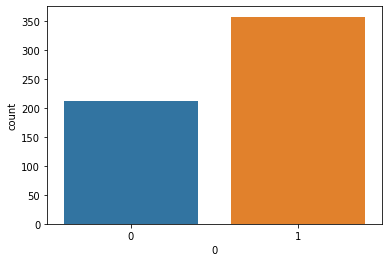

In [11]:
sns.countplot(classe['0']);

In [12]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25)

In [13]:
previsores_treinamento

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
540,11.54,14.44,74.65,402.9,0.09984,112.00000,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.13450,0.2118,0.1797,0.06918,0.2329,0.08134
260,20.31,27.06,132.90,1288.0,0.10000,0.10880,0.15190,0.09333,0.1814,0.05572,...,24.33,39.16,162.30,1844.0,0.15220,0.2945,0.3788,0.16970,0.3151,0.07999
410,11.36,17.57,72.49,399.8,0.08858,0.05313,0.02783,21.00000,0.1601,0.05913,...,13.05,36.32,85.07,521.3,0.14530,0.1622,0.1811,0.08698,0.2973,0.07745
26,14.58,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.08783,0.2252,0.06924,...,17.62,33.21,122.40,896.9,0.15250,0.6643,0.5539,0.27010,0.4264,0.12750
498,18.49,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.09183,0.1832,0.06697,...,22.75,22.88,146.40,1600.0,0.14120,0.3089,0.3533,0.16630,251.0000,0.09445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,162.0000,0.06582,...,13.06,17.16,82.96,512.5,0.14310,0.1851,0.1922,0.08449,0.2772,0.08756
322,12.86,13.32,82.82,504.8,0.11340,0.08834,38.00000,34.00000,0.1543,0.06476,...,14.04,21.08,92.80,599.5,0.15470,0.2231,0.1791,0.11550,0.2382,0.08553
382,12.05,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.02978,0.1203,0.06659,...,12.57,28.71,87.36,488.4,0.08799,0.3214,0.2912,0.10920,0.2191,0.09349
365,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,0.1618,0.05557,...,24.31,26.37,161.20,1780.0,0.13270,0.2376,0.2702,0.17650,0.2609,0.06735


In [14]:
previsores_treinamento.shape

(426, 30)

In [15]:
classe_treinamento.shape

(426, 1)

In [16]:
previsores_teste.shape

(143, 30)

In [17]:
classe_teste.shape

(143, 1)

In [18]:
#transformacao dos dados para tensores
#por estar como um DataFrame, e necessario converter para uma matriz usando o numpy.
type(previsores_treinamento)

pandas.core.frame.DataFrame

In [19]:
#convertendo para matriz
type(np.array(previsores_treinamento))

numpy.ndarray

In [20]:
np.array(previsores_treinamento)

array([[1.154e+01, 1.444e+01, 7.465e+01, ..., 6.918e-02, 2.329e-01,
        8.134e-02],
       [2.031e+01, 2.706e+01, 1.329e+02, ..., 1.697e-01, 3.151e-01,
        7.999e-02],
       [1.136e+01, 1.757e+01, 7.249e+01, ..., 8.698e-02, 2.973e-01,
        7.745e-02],
       ...,
       [1.205e+01, 2.272e+01, 7.875e+01, ..., 1.092e-01, 2.191e-01,
        9.349e-02],
       [2.044e+01, 2.178e+01, 1.338e+02, ..., 1.765e-01, 2.609e-01,
        6.735e-02],
       [1.174e+01, 1.469e+01, 7.631e+01, ..., 1.056e-01, 2.604e-01,
        9.879e-02]])

In [21]:
#convertemos agora de matriz para tensor
previsores_treinamento = torch.tensor(np.array(previsores_treinamento), dtype=torch.float)
classe_treinamento = torch.tensor(np.array(classe_treinamento), dtype=torch.float)

In [23]:
type(previsores_treinamento)

torch.Tensor

In [24]:
type(classe_treinamento)

torch.Tensor

In [25]:
#criando uma variavel para armazenar o conteudo do tensor e das variaveis de previsores e classe, convertidas.
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)

In [26]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [27]:
#criando pacotes de 10 para calculos e ajustes de pesos.
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

In [28]:
#temos 30 atributos de entrada, propriedades que definem as caracteristicas da doenca e precisamos classifica-las baseado nos calculos em 
#neuronios ocultos. eis o motivo pelo qual criaremos duas colunas de neuronios para efetuarmos os calculos
#30-> 16 ->16 ->1
#(entradas + saidas) / 2 = (30+1)/2 = 16(arredondando)
classificador = nn.Sequential(nn.Linear(in_features=30, out_features=16),
                             nn.ReLU(),
                             nn.Linear(16,16),
                             nn.ReLU(),
                             nn.Linear(16,1),
                             nn.Sigmoid()
                             )

In [29]:
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [30]:
#BINARY CROSS ENTROPY = BCE
criterion = nn.BCELoss()

In [31]:
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

In [32]:
#treinamento do modelo
for epoch in range(100):
    running_loss = 0.
    for data in train_loader:
        inputs, labels = data
        #print(inputs)
        #print('______')
        #print(labels)
        optimizer.zero_grad()
        
        outputs = classificador(inputs)#classificador.fowars(inputs)
        #print(outputs)
        loss = criterion(outputs, labels)
        #print(loss)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        print('Epoca %3d: perda %.5f' % (epoch+1, running_loss/len(train_loader)))

Epoca   1: perda 0.27021
Epoca   1: perda 0.54766
Epoca   1: perda 0.58565
Epoca   1: perda 1.07202
Epoca   1: perda 1.17364
Epoca   1: perda 1.19909
Epoca   1: perda 1.23922
Epoca   1: perda 1.75346
Epoca   1: perda 2.46770
Epoca   1: perda 2.72610
Epoca   1: perda 3.22916
Epoca   1: perda 3.48209
Epoca   1: perda 3.72941
Epoca   1: perda 4.21841
Epoca   1: perda 4.24082
Epoca   1: perda 4.49259
Epoca   1: perda 4.51449
Epoca   1: perda 5.00199
Epoca   1: perda 5.47958
Epoca   1: perda 5.49520
Epoca   1: perda 5.73954
Epoca   1: perda 5.98287
Epoca   1: perda 5.99352
Epoca   1: perda 6.23456
Epoca   1: perda 6.43841
Epoca   1: perda 6.45406
Epoca   1: perda 6.71626
Epoca   1: perda 7.19326
Epoca   1: perda 7.21437
Epoca   1: perda 7.45638
Epoca   1: perda 7.67041
Epoca   1: perda 7.92031
Epoca   1: perda 8.58518
Epoca   1: perda 8.83352
Epoca   1: perda 9.03555
Epoca   1: perda 9.04864
Epoca   1: perda 9.22314
Epoca   1: perda 9.65141
Epoca   1: perda 9.90291
Epoca   1: perda 10.33630

Epoca   8: perda 0.53551
Epoca   8: perda 0.54276
Epoca   8: perda 0.54760
Epoca   8: perda 0.55308
Epoca   8: perda 0.55460
Epoca   9: perda 0.23991
Epoca   9: perda 0.24664
Epoca   9: perda 0.25878
Epoca   9: perda 0.26072
Epoca   9: perda 0.26483
Epoca   9: perda 0.27451
Epoca   9: perda 0.28089
Epoca   9: perda 0.28635
Epoca   9: perda 0.29250
Epoca   9: perda 0.30169
Epoca   9: perda 0.30685
Epoca   9: perda 0.31823
Epoca   9: perda 0.32103
Epoca   9: perda 0.32935
Epoca   9: perda 0.33887
Epoca   9: perda 0.34550
Epoca   9: perda 0.34974
Epoca   9: perda 0.35323
Epoca   9: perda 0.36009
Epoca   9: perda 0.36751
Epoca   9: perda 0.37891
Epoca   9: perda 0.38979
Epoca   9: perda 0.39780
Epoca   9: perda 0.40684
Epoca   9: perda 0.41150
Epoca   9: perda 0.41464
Epoca   9: perda 0.42511
Epoca   9: perda 0.43180
Epoca   9: perda 0.44330
Epoca   9: perda 0.46043
Epoca   9: perda 0.46589
Epoca   9: perda 0.47890
Epoca   9: perda 0.48430
Epoca   9: perda 0.48739
Epoca   9: perda 0.49169


Epoca  17: perda 0.38169
Epoca  17: perda 0.38605
Epoca  17: perda 0.39194
Epoca  17: perda 0.39535
Epoca  17: perda 0.39892
Epoca  17: perda 0.40961
Epoca  17: perda 0.41936
Epoca  17: perda 0.42891
Epoca  17: perda 0.43434
Epoca  17: perda 0.44488
Epoca  17: perda 0.45152
Epoca  17: perda 0.45434
Epoca  17: perda 0.46458
Epoca  17: perda 0.46974
Epoca  17: perda 0.47309
Epoca  17: perda 0.47572
Epoca  17: perda 0.47835
Epoca  17: perda 0.48500
Epoca  17: perda 0.48638
Epoca  17: perda 0.48917
Epoca  17: perda 0.49301
Epoca  17: perda 0.49602
Epoca  18: perda 0.00799
Epoca  18: perda 0.01420
Epoca  18: perda 0.04966
Epoca  18: perda 0.05411
Epoca  18: perda 0.06037
Epoca  18: perda 0.06399
Epoca  18: perda 0.06784
Epoca  18: perda 0.07603
Epoca  18: perda 0.08384
Epoca  18: perda 0.09016
Epoca  18: perda 0.09727
Epoca  18: perda 0.10998
Epoca  18: perda 0.11364
Epoca  18: perda 0.14189
Epoca  18: perda 0.15690
Epoca  18: perda 0.16016
Epoca  18: perda 0.17305
Epoca  18: perda 0.17516


Epoca  25: perda 0.17461
Epoca  25: perda 0.19347
Epoca  25: perda 0.19776
Epoca  25: perda 0.22153
Epoca  25: perda 0.22695
Epoca  25: perda 0.23424
Epoca  25: perda 0.24258
Epoca  25: perda 0.24488
Epoca  25: perda 0.24915
Epoca  25: perda 0.25009
Epoca  25: perda 0.25432
Epoca  25: perda 0.25973
Epoca  25: perda 0.26110
Epoca  25: perda 0.26862
Epoca  25: perda 0.27544
Epoca  26: perda 0.00829
Epoca  26: perda 0.01267
Epoca  26: perda 0.01597
Epoca  26: perda 0.01765
Epoca  26: perda 0.02099
Epoca  26: perda 0.02889
Epoca  26: perda 0.02996
Epoca  26: perda 0.03745
Epoca  26: perda 0.03919
Epoca  26: perda 0.04394
Epoca  26: perda 0.04693
Epoca  26: perda 0.05908
Epoca  26: perda 0.07165
Epoca  26: perda 0.07547
Epoca  26: perda 0.08612
Epoca  26: perda 0.08662
Epoca  26: perda 0.09156
Epoca  26: perda 0.10047
Epoca  26: perda 0.10701
Epoca  26: perda 0.10851
Epoca  26: perda 0.11007
Epoca  26: perda 0.12350
Epoca  26: perda 0.14681
Epoca  26: perda 0.14906
Epoca  26: perda 0.15152


Epoca  34: perda 0.03308
Epoca  34: perda 0.03468
Epoca  34: perda 0.03979
Epoca  34: perda 0.04123
Epoca  34: perda 0.05197
Epoca  34: perda 0.05570
Epoca  34: perda 0.05846
Epoca  34: perda 0.06445
Epoca  34: perda 0.06502
Epoca  34: perda 0.06655
Epoca  34: perda 0.06898
Epoca  34: perda 0.07259
Epoca  34: perda 0.08057
Epoca  34: perda 0.08335
Epoca  34: perda 0.08684
Epoca  34: perda 0.08794
Epoca  34: perda 0.09033
Epoca  34: perda 0.09348
Epoca  34: perda 0.09620
Epoca  34: perda 0.09988
Epoca  34: perda 0.10351
Epoca  34: perda 0.10547
Epoca  34: perda 0.11148
Epoca  34: perda 0.11656
Epoca  34: perda 0.13256
Epoca  34: perda 0.13874
Epoca  34: perda 0.14778
Epoca  34: perda 0.15793
Epoca  34: perda 0.16120
Epoca  34: perda 0.16611
Epoca  34: perda 0.16970
Epoca  34: perda 0.17814
Epoca  34: perda 0.18350
Epoca  34: perda 0.19019
Epoca  34: perda 0.19472
Epoca  34: perda 0.19656
Epoca  34: perda 0.20235
Epoca  34: perda 0.20688
Epoca  34: perda 0.20888
Epoca  35: perda 0.00106


Epoca  42: perda 0.05390
Epoca  42: perda 0.05681
Epoca  42: perda 0.05907
Epoca  42: perda 0.06217
Epoca  42: perda 0.06551
Epoca  42: perda 0.06628
Epoca  42: perda 0.06652
Epoca  42: perda 0.07239
Epoca  42: perda 0.08276
Epoca  42: perda 0.08598
Epoca  42: perda 0.09090
Epoca  42: perda 0.10194
Epoca  42: perda 0.10684
Epoca  42: perda 0.10818
Epoca  42: perda 0.11110
Epoca  42: perda 0.11450
Epoca  42: perda 0.12040
Epoca  42: perda 0.12387
Epoca  42: perda 0.12668
Epoca  42: perda 0.12736
Epoca  42: perda 0.14459
Epoca  42: perda 0.15343
Epoca  42: perda 0.15747
Epoca  42: perda 0.16405
Epoca  42: perda 0.16434
Epoca  42: perda 0.16672
Epoca  42: perda 0.17064
Epoca  42: perda 0.17142
Epoca  42: perda 0.17246
Epoca  42: perda 0.17426
Epoca  42: perda 0.18287
Epoca  43: perda 0.00652
Epoca  43: perda 0.01115
Epoca  43: perda 0.01184
Epoca  43: perda 0.01653
Epoca  43: perda 0.02253
Epoca  43: perda 0.02934
Epoca  43: perda 0.02998
Epoca  43: perda 0.03335
Epoca  43: perda 0.03739


Epoca  51: perda 0.01444
Epoca  51: perda 0.02046
Epoca  51: perda 0.02461
Epoca  51: perda 0.02836
Epoca  51: perda 0.02846
Epoca  51: perda 0.03011
Epoca  51: perda 0.03622
Epoca  51: perda 0.04158
Epoca  51: perda 0.04706
Epoca  51: perda 0.04826
Epoca  51: perda 0.06593
Epoca  51: perda 0.06887
Epoca  51: perda 0.07406
Epoca  51: perda 0.07463
Epoca  51: perda 0.07572
Epoca  51: perda 0.08074
Epoca  51: perda 0.08535
Epoca  51: perda 0.09085
Epoca  51: perda 0.09460
Epoca  51: perda 0.09503
Epoca  51: perda 0.09564
Epoca  51: perda 0.09869
Epoca  51: perda 0.09924
Epoca  51: perda 0.10300
Epoca  51: perda 0.10771
Epoca  51: perda 0.11270
Epoca  51: perda 0.11604
Epoca  51: perda 0.12007
Epoca  51: perda 0.12701
Epoca  51: perda 0.12853
Epoca  51: perda 0.13618
Epoca  51: perda 0.13702
Epoca  51: perda 0.14671
Epoca  51: perda 0.15149
Epoca  51: perda 0.15402
Epoca  51: perda 0.15745
Epoca  51: perda 0.16039
Epoca  51: perda 0.16159
Epoca  51: perda 0.16804
Epoca  51: perda 0.16857


Epoca  59: perda 0.14256
Epoca  59: perda 0.14257
Epoca  60: perda 0.00098
Epoca  60: perda 0.00188
Epoca  60: perda 0.01686
Epoca  60: perda 0.01898
Epoca  60: perda 0.03098
Epoca  60: perda 0.03320
Epoca  60: perda 0.03567
Epoca  60: perda 0.04245
Epoca  60: perda 0.05686
Epoca  60: perda 0.06467
Epoca  60: perda 0.06520
Epoca  60: perda 0.06632
Epoca  60: perda 0.06980
Epoca  60: perda 0.07206
Epoca  60: perda 0.07510
Epoca  60: perda 0.07700
Epoca  60: perda 0.07760
Epoca  60: perda 0.08246
Epoca  60: perda 0.08407
Epoca  60: perda 0.08543
Epoca  60: perda 0.08900
Epoca  60: perda 0.08954
Epoca  60: perda 0.09441
Epoca  60: perda 0.09468
Epoca  60: perda 0.09774
Epoca  60: perda 0.09817
Epoca  60: perda 0.10500
Epoca  60: perda 0.10673
Epoca  60: perda 0.11537
Epoca  60: perda 0.11943
Epoca  60: perda 0.12480
Epoca  60: perda 0.13084
Epoca  60: perda 0.13278
Epoca  60: perda 0.13554
Epoca  60: perda 0.13791
Epoca  60: perda 0.13811
Epoca  60: perda 0.14037
Epoca  60: perda 0.14476


Epoca  68: perda 0.05032
Epoca  68: perda 0.05143
Epoca  68: perda 0.05451
Epoca  68: perda 0.06222
Epoca  68: perda 0.06484
Epoca  68: perda 0.06633
Epoca  68: perda 0.06952
Epoca  68: perda 0.07525
Epoca  68: perda 0.07833
Epoca  68: perda 0.08000
Epoca  68: perda 0.08090
Epoca  68: perda 0.09036
Epoca  68: perda 0.09046
Epoca  68: perda 0.09601
Epoca  68: perda 0.09718
Epoca  68: perda 0.10093
Epoca  68: perda 0.10164
Epoca  68: perda 0.10448
Epoca  68: perda 0.10633
Epoca  68: perda 0.11042
Epoca  68: perda 0.11416
Epoca  68: perda 0.11529
Epoca  68: perda 0.11883
Epoca  68: perda 0.12345
Epoca  68: perda 0.12555
Epoca  68: perda 0.13194
Epoca  68: perda 0.13691
Epoca  68: perda 0.13698
Epoca  68: perda 0.13718
Epoca  68: perda 0.14813
Epoca  68: perda 0.14837
Epoca  68: perda 0.14847
Epoca  69: perda 0.00129
Epoca  69: perda 0.00379
Epoca  69: perda 0.01118
Epoca  69: perda 0.01265
Epoca  69: perda 0.01626
Epoca  69: perda 0.01889
Epoca  69: perda 0.01944
Epoca  69: perda 0.01981


Epoca  77: perda 0.04432
Epoca  77: perda 0.04548
Epoca  77: perda 0.04886
Epoca  77: perda 0.04991
Epoca  77: perda 0.05618
Epoca  77: perda 0.05695
Epoca  77: perda 0.05947
Epoca  77: perda 0.05985
Epoca  77: perda 0.06205
Epoca  77: perda 0.06216
Epoca  77: perda 0.06323
Epoca  77: perda 0.06345
Epoca  77: perda 0.06454
Epoca  77: perda 0.06689
Epoca  77: perda 0.06789
Epoca  77: perda 0.07096
Epoca  77: perda 0.07181
Epoca  77: perda 0.07246
Epoca  77: perda 0.07917
Epoca  77: perda 0.08375
Epoca  77: perda 0.09042
Epoca  77: perda 0.09407
Epoca  77: perda 0.09451
Epoca  77: perda 0.10107
Epoca  77: perda 0.10319
Epoca  77: perda 0.10463
Epoca  77: perda 0.10653
Epoca  77: perda 0.11255
Epoca  77: perda 0.11584
Epoca  77: perda 0.12005
Epoca  77: perda 0.12104
Epoca  77: perda 0.12302
Epoca  78: perda 0.00412
Epoca  78: perda 0.00473
Epoca  78: perda 0.00668
Epoca  78: perda 0.01101
Epoca  78: perda 0.01231
Epoca  78: perda 0.01420
Epoca  78: perda 0.01890
Epoca  78: perda 0.01911


Epoca  85: perda 0.11919
Epoca  85: perda 0.12080
Epoca  85: perda 0.12114
Epoca  86: perda 0.00077
Epoca  86: perda 0.00774
Epoca  86: perda 0.00836
Epoca  86: perda 0.00876
Epoca  86: perda 0.00921
Epoca  86: perda 0.01200
Epoca  86: perda 0.02052
Epoca  86: perda 0.02721
Epoca  86: perda 0.02897
Epoca  86: perda 0.03404
Epoca  86: perda 0.03726
Epoca  86: perda 0.03904
Epoca  86: perda 0.04005
Epoca  86: perda 0.05002
Epoca  86: perda 0.05093
Epoca  86: perda 0.05472
Epoca  86: perda 0.05683
Epoca  86: perda 0.05822
Epoca  86: perda 0.05897
Epoca  86: perda 0.06062
Epoca  86: perda 0.06146
Epoca  86: perda 0.06365
Epoca  86: perda 0.06706
Epoca  86: perda 0.06926
Epoca  86: perda 0.06998
Epoca  86: perda 0.07259
Epoca  86: perda 0.07791
Epoca  86: perda 0.07863
Epoca  86: perda 0.07880
Epoca  86: perda 0.08288
Epoca  86: perda 0.08296
Epoca  86: perda 0.08621
Epoca  86: perda 0.08694
Epoca  86: perda 0.08886
Epoca  86: perda 0.08930
Epoca  86: perda 0.09255
Epoca  86: perda 0.09451


Epoca  94: perda 0.10822
Epoca  94: perda 0.10880
Epoca  94: perda 0.11764
Epoca  94: perda 0.11804
Epoca  94: perda 0.12062
Epoca  94: perda 0.12248
Epoca  94: perda 0.12335
Epoca  94: perda 0.12368
Epoca  94: perda 0.12491
Epoca  94: perda 0.12710
Epoca  94: perda 0.13033
Epoca  94: perda 0.13112
Epoca  94: perda 0.13129
Epoca  95: perda 0.00277
Epoca  95: perda 0.00905
Epoca  95: perda 0.00976
Epoca  95: perda 0.01027
Epoca  95: perda 0.01571
Epoca  95: perda 0.01768
Epoca  95: perda 0.02230
Epoca  95: perda 0.02544
Epoca  95: perda 0.03247
Epoca  95: perda 0.03653
Epoca  95: perda 0.03737
Epoca  95: perda 0.03981
Epoca  95: perda 0.04747
Epoca  95: perda 0.04800
Epoca  95: perda 0.04829
Epoca  95: perda 0.04897
Epoca  95: perda 0.05189
Epoca  95: perda 0.05255
Epoca  95: perda 0.05314
Epoca  95: perda 0.05367
Epoca  95: perda 0.05430
Epoca  95: perda 0.06120
Epoca  95: perda 0.06672
Epoca  95: perda 0.06688
Epoca  95: perda 0.06992
Epoca  95: perda 0.07115
Epoca  95: perda 0.07340


In [33]:
#VISUALIZACAO DOS PESOS
#30 -> 16 -> 16 -> 1
params = list(classificador.parameters())

In [34]:
pesos0 = params[0]
pesos0.shape

torch.Size([16, 30])

In [35]:
print(pesos0)

Parameter containing:
tensor([[-7.0258e-02, -1.0199e-01, -1.8602e-01,  4.8560e-02, -1.5480e-01,
          9.6745e-02, -1.3550e-01, -1.2430e-01, -2.2426e-01,  1.6842e-01,
         -3.0857e-02,  6.0698e-02, -1.1684e-01, -1.0437e-01,  2.7638e-03,
         -2.2875e-01, -3.9585e-01, -6.4665e-02,  3.7699e-02,  5.8524e-03,
          1.3933e-01, -7.6381e-02, -4.8446e-02,  1.3408e-01,  4.8833e-01,
          1.3421e-01, -1.8142e-01,  4.8563e-02,  2.9079e-01,  4.5231e-02],
        [ 1.9537e-01,  2.0075e-01,  2.8692e-01,  9.9866e-02, -1.3296e-01,
         -8.4800e-02, -7.1698e-02, -1.3470e-01, -3.6177e-02,  2.8553e-01,
         -6.3587e-02, -8.6378e-02, -9.4687e-03,  1.6741e-01, -6.5462e-03,
         -9.3049e-02, -1.1085e-02,  2.1194e-01,  1.0281e-01, -1.6309e-02,
          9.8318e-02,  5.3291e-02,  1.8899e-01,  7.8429e-03, -1.8200e-02,
         -2.4748e-01, -1.7229e-01, -1.4074e-02, -6.7425e-02, -1.7010e-01],
        [-1.2261e-02, -5.1042e-02, -2.4776e-01, -1.0664e-01, -1.1979e-02,
          4.94

In [36]:
bias0 = params[1]
bias0.shape

torch.Size([16])

In [37]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [38]:
bias1 = params[3]
bias1.shape

torch.Size([16])

In [39]:
#AVALIACAO DO MODELO
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [40]:
type(previsores_teste)

pandas.core.frame.DataFrame

In [41]:
previsores_teste = torch.tensor(np.array(previsores_teste),dtype=torch.float)

In [42]:
type(previsores_teste)

torch.Tensor

In [43]:
previsoes = classificador.forward(previsores_teste)

In [44]:
previsoes

tensor([[9.9355e-01],
        [1.0000e+00],
        [2.9422e-01],
        [9.2651e-01],
        [8.3251e-05],
        [8.4928e-01],
        [9.5924e-01],
        [9.9991e-01],
        [6.6299e-01],
        [5.7436e-01],
        [7.9064e-01],
        [9.9799e-01],
        [5.4713e-01],
        [9.9517e-01],
        [9.9611e-01],
        [8.4850e-01],
        [9.9596e-01],
        [1.0000e+00],
        [3.0448e-01],
        [9.9696e-01],
        [2.6380e-10],
        [6.6201e-03],
        [5.5911e-01],
        [1.0000e+00],
        [9.0192e-01],
        [3.6463e-03],
        [8.0374e-01],
        [9.9998e-01],
        [9.0438e-05],
        [9.9757e-01],
        [4.8416e-01],
        [9.9999e-01],
        [9.3972e-01],
        [9.8572e-01],
        [3.5887e-01],
        [9.9732e-01],
        [5.8344e-01],
        [9.9820e-01],
        [9.9441e-01],
        [3.3888e-05],
        [4.6330e-03],
        [9.1988e-01],
        [5.5690e-08],
        [3.7427e-01],
        [5.1454e-05],
        [7

In [51]:
previsoes = np.array(previsoes > 0.5)
previsoes

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [46]:
classe_teste

,0
333,1
273,1
201,0
178,1
85,0
...,...
230,0
282,0
535,0
436,1


In [47]:
taxa_acerto = accuracy_score(classe_teste, previsoes) #real x previsoes
taxa_acerto

0.9020979020979021

In [48]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[43, 11],
       [ 3, 86]], dtype=int64)

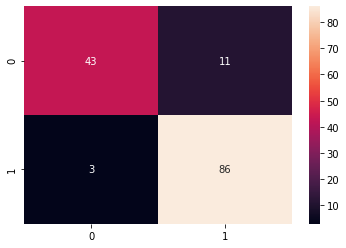

In [49]:
sns.heatmap(matriz, annot=True);